In [1]:
#importing important liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data=pd.read_csv('car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
data.shape

(1727, 7)

In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns=col_names
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
for i in col_names:
    print(data[i].value_counts())

high     432
low      432
med      432
vhigh    431
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    431
Name: maint, dtype: int64
5more    432
3        432
4        432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
big      576
med      576
small    575
Name: lug_boot, dtype: int64
high    576
med     576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
#checking Unique Values in data
for i in col_names:
    print(i,data[i].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['med' 'high' 'low']
class ['unacc' 'acc' 'vgood' 'good']


In [8]:
#checking is there any null values in data columns
data.columns.isnull()

array([False, False, False, False, False, False, False])

In [9]:
#count values in column
data['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

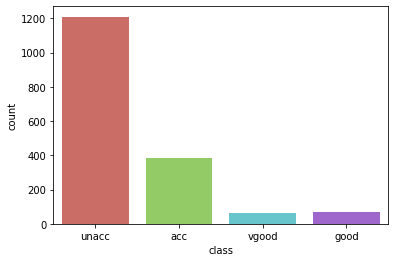

In [11]:
import seaborn as sns
sns.countplot(x='class',data=data,palette='hls')

In [12]:
#creating input feature and target feature
X=data.loc[:,data.columns != 'class']
y=data.loc[:,data.columns == 'class']

In [13]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y)

In [14]:
#installed categorical encoder
#! pip install category_encoders

In [15]:
#transforming into text to numeric in ordinal manner
import category_encoders as ce

encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
train_x=encoder.fit_transform(train_x)
test_x=encoder.transform(test_x)

encoder2=ce.OrdinalEncoder(cols=['class'])
train_y=encoder2.fit_transform(train_y)
test_y=encoder2.transform(test_y)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dt_clf_gini.fit(train_x,train_y)
y_train_pred_gini=dt_clf_gini.predict(train_x)

In [17]:
#gini pred
pred_test_gini=dt_clf_gini.predict(test_x)
from sklearn.metrics import accuracy_score,confusion_matrix
#overfiting check
print('Accuracy For Train Data :',accuracy_score(train_y,y_train_pred_gini))
print('Accuracy For Test Data :',accuracy_score(test_y,pred_test_gini))


Accuracy For Train Data : 0.7783783783783784
Accuracy For Test Data : 0.8148148148148148


[Text(446.40000000000003, 475.65000000000003, 'X[5] <= 2.5\ngini = 0.472\nsamples = 1295\nvalue = [888, 303, 54, 50]'),
 Text(334.8, 339.75, 'X[3] <= 2.5\ngini = 0.588\nsamples = 870\nvalue = [463, 303, 54, 50]'),
 Text(223.20000000000002, 203.85000000000002, 'X[1] <= 2.5\ngini = 0.625\nsamples = 594\nvalue = [187, 303, 54, 50]'),
 Text(111.60000000000001, 67.94999999999999, 'gini = 0.532\nsamples = 296\nvalue = [145, 141, 0, 10]'),
 Text(334.8, 67.94999999999999, 'gini = 0.634\nsamples = 298\nvalue = [42, 162, 54, 40]'),
 Text(446.40000000000003, 203.85000000000002, 'gini = 0.0\nsamples = 276\nvalue = [276, 0, 0, 0]'),
 Text(558.0, 339.75, 'gini = 0.0\nsamples = 425\nvalue = [425, 0, 0, 0]')]

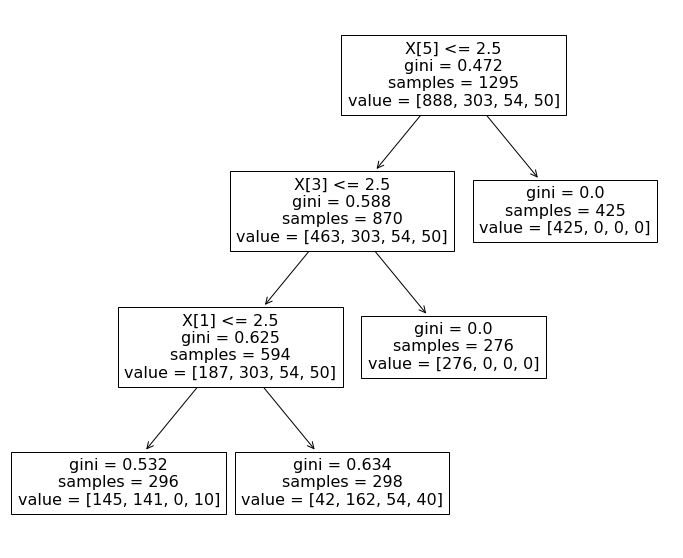

In [18]:
#visualize decision tree
plt.figure(figsize=(12,10))
from sklearn import tree
tree.plot_tree(dt_clf_gini.fit(train_x,train_y))

In [19]:
#istalling graphviz liabrary for more simple DT visualization
#! pip install graphviz
train_y

,class
154,1
955,2
927,1
196,1
546,1
...,...
1327,1
376,2
1283,1
1110,1


In [20]:
#istalling pydotplus liabrary for more simple DT visualization
#! pip install pydotplus
test_y.set_index('class',inplace=True)

In [21]:
train_y

,class
154,1
955,2
927,1
196,1
546,1
...,...
1327,1
376,2
1283,1
1110,1


In [22]:
from sklearn.metrics import precision_score,recall_score
confusion_matrix(test_y,pred_test_gini)

ValueError: Classification metrics can't handle a mix of unknown and binary targets